# Table of Contents
Introduction
Import
Analysis & Preprocessing
Model
Training
Analysis & Conclusion

# 1. Introduction
References:

- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3. Analysis & Preprocessing

In [7]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(data)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       2.116693                1.364192   
1                       1.781763                1.577277   
2                       2.423065                1.424487   
3                       4.657487                1.366376   
4                       3.795704                1.701514   
...                          ...                     ...   
4221                    3.332053                2.220377   
4222                    4.258130               -2.535943   
4223                    7.826457                2.169780   
4224                   -0.702316                2.439427   
4225                   -2.373678               -3.566134   

      Left-Lateral-Ventricle  lh_lateralorbitofrontal_thickness  SurfaceHoles  \
0                   1.509748                          -2.002599     -1.880989   
1                   1.751934                          -1.118212     -1.487208   
2     

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_lateralorbitofrontal_thickness,SurfaceHoles,CC_Posterior,rh_entorhinal_thickness,CC_Posterior,Right-Caudate,MaskVol-to-eTIV,rh_frontalpole_thickness,MaskVol-to-eTIV,Right-Cerebellum-White-Matter,MaskVol-to-eTIV,Right-vessel,non-WM-hypointensities,lh_caudalanteriorcingulate_thickness,5th-Ventricle,non-WM-hypointensities,non-WM-hypointensities
0,2.116693,1.364192,1.509748,-2.002599,-1.880989,2.280240,-1.649017,-0.013002,-0.463273,1.806703,-0.687286,0.117551,-1.133781,1.583529,-1.050681,-0.350294,0.050377,0.654754,-0.249875,0.314114
1,1.781763,1.577277,1.751934,-1.118212,-1.487208,2.081013,-1.815469,-0.373819,-0.921829,1.988084,-0.633688,0.555333,-0.921768,1.505786,-1.468032,-0.656735,-0.563480,0.387211,-0.164285,0.567488
2,2.423065,1.424487,1.583753,-1.542553,-1.247020,1.777330,-2.457862,-0.636127,-1.267629,1.766556,-0.745162,0.523402,-0.491618,1.793263,-1.035388,-0.753502,-0.326453,-0.013440,0.064524,0.011248
3,4.657487,1.366376,1.174610,-0.637378,-1.459954,2.261775,-1.243540,-0.939366,-1.091465,1.569311,-0.561350,0.049202,-0.504380,1.885197,-1.431387,-0.058165,-0.323348,0.436006,-0.034263,0.049757
4,3.795704,1.701514,2.226974,-1.242180,-1.389867,2.826780,-1.685151,-0.289005,-0.690919,1.806288,-0.863777,0.423945,-1.061839,2.109071,-0.636920,-0.555999,-0.498166,0.889112,-0.223978,0.735370


In [9]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


# 4. Model

In [10]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))


opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 activation_2 (Activation)   (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3

# 5. Training

In [11]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=64,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/100
53/53 [==============================] - 1s 9ms/step - loss: 10.6953 - msle: 10.6953 - val_loss: 6.5334 - val_msle: 6.5334
Epoch 2/100
53/53 [==============================] - 0s 6ms/step - loss: 4.5292 - msle: 4.5292 - val_loss: 2.6496 - val_msle: 2.6496
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 1.8335 - msle: 1.8335 - val_loss: 1.0753 - val_msle: 1.0753
Epoch 4/100
53/53 [==============================] - 0s 6ms/step - loss: 0.8002 - msle: 0.8002 - val_loss: 0.5077 - val_msle: 0.5077
Epoch 5/100
53/53 [==============================] - 0s 6ms/step - loss: 0.4170 - msle: 0.4170 - val_loss: 0.2983 - val_msle: 0.2983
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.2711 - msle: 0.2711 - val_loss: 0.2202 - val_msle: 0.2202
Epoch 7/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2126 - msle: 0.2126 - val_loss: 0.1888 - val_msle: 0.1888
Epoch 8/100
53/53 [==============================] - 0s 6ms/step - 

53/53 [==============================] - 0s 7ms/step - loss: 0.0386 - msle: 0.0386 - val_loss: 0.0483 - val_msle: 0.0483
Epoch 63/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0380 - msle: 0.0380 - val_loss: 0.0477 - val_msle: 0.0477
Epoch 64/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0374 - msle: 0.0374 - val_loss: 0.0471 - val_msle: 0.0471
Epoch 65/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0368 - msle: 0.0368 - val_loss: 0.0468 - val_msle: 0.0468
Epoch 66/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0363 - msle: 0.0363 - val_loss: 0.0462 - val_msle: 0.0462
Epoch 67/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0357 - msle: 0.0357 - val_loss: 0.0457 - val_msle: 0.0457
Epoch 68/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0351 - msle: 0.0351 - val_loss: 0.0452 - val_msle: 0.0452
Epoch 69/100
53/53 [==============================] - 0s 5ms/step - loss: 0

# 6. Analysis & Conclusion

In [12]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8541050029733335
Max Error: 24.369579315185547
Mean absolute error: 5.893319309882398
Mean squared error: 58.17547062534669
Root Mean squared error: 7.627284616778549
R2: 0.8516267727641924


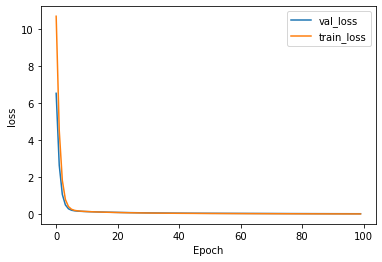

In [13]:
x = list(range(100))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()